In [ ]:
# Text clustering is a natural language processing (NLP) technique that groups similar documents into clusters.
# In this example, we'll use K-means clustering to cluster a set of documents based on their TF-IDF vectors.
#  We'll then visualize the clusters using TruncatedSVD for dimensionality reduction.

In [ ]:
# Steps:
# TF-IDF Vectorization: Convert the documents into TF-IDF vectors.
# Dimensionality Reduction: Reduce the dimensionality of the TF-IDF vectors using TruncatedSVD.
# Clustering: Apply K-means clustering to the reduced vectors.
# Visualization: Visualize the clusters in 2D space.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


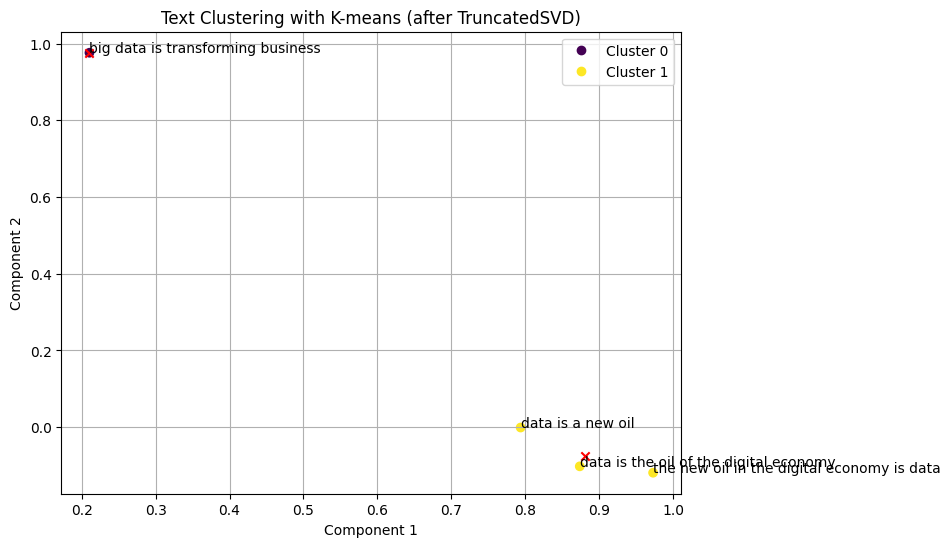

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample documents
docs = [
    "data is the oil of the digital economy",
    "data is a new oil",
    "big data is transforming business",
    "the new oil in the digital economy is data"
]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectors = tfidf_vectorizer.fit_transform(docs)

# Dimensionality Reduction with TruncatedSVD
svd = TruncatedSVD(n_components=2)
reduced_vectors = svd.fit_transform(tfidf_vectors)

# Clustering with K-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_vectors)

# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap='viridis')

# Annotate each point with the corresponding document text
for i, txt in enumerate(docs):
    plt.annotate(txt, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Adding cluster centers to the plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Cluster Centers')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Text Clustering with K-means (after TruncatedSVD)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster Centers'])
plt.grid(True)
plt.show()
